In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [6]:
X,y = load_data()

In [7]:
print("The first element of X is :", X[0])

The first element of X is : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [8]:
print("The first element of y is:", y[0,0])
print("The last element of y is:", y[-1,0])

The first element of y is: 0
The last element of y is: 1


In [9]:
print("The shape of X is:" +str(X.shape))
print("The shape of y is:" +str(y.shape))

The shape of X is:(1000, 400)
The shape of y is:(1000, 1)


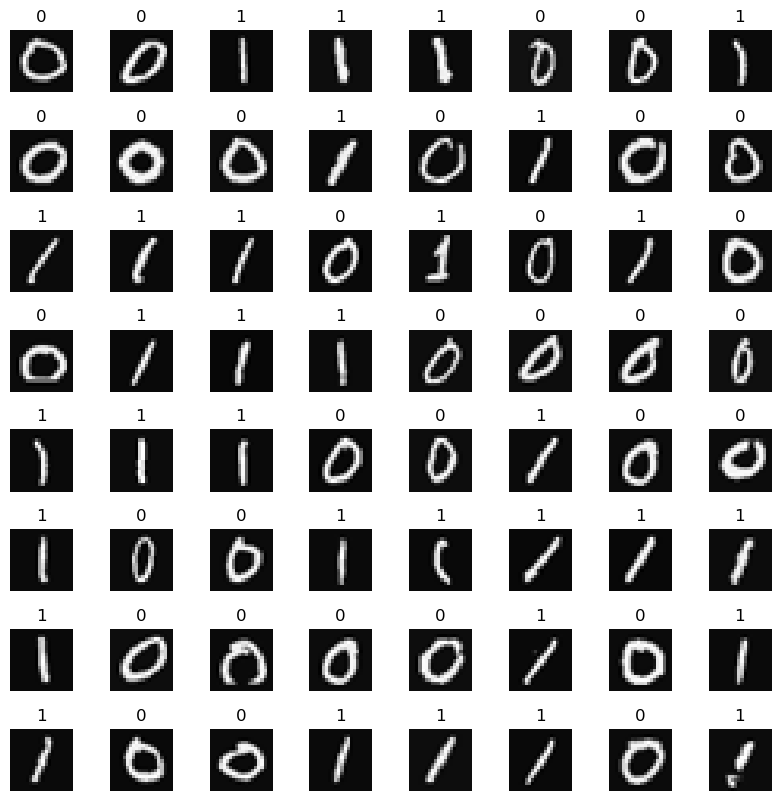

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [11]:
#TENSORFLOW MODEL IMPLEMENTATION
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation = 'sigmoid'),
        Dense(15, activation = 'sigmoid'),
        Dense(1, activation = 'sigmoid')
    ], name = 'my_model'
)

In [12]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
from public_tests import *

test_c1(model)

All tests passed!


In [15]:
L1_num_params = 400 * 25 + 25
L2_num_params = 25 * 15 + 15
L3_num_params = 15 * 1 + 1

print("L1 params = ",L1_num_params, ",L2 params = ",L2_num_params, ",L3 params = ",L3_num_params)

L1 params =  10025 ,L2 params =  390 ,L3 params =  16


In [16]:
[layer1, layer2, layer3] = model.layers

In [17]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [18]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.18768263],
       [ 0.5723378 ],
       [ 0.5689153 ],
       [ 0.32184237],
       [ 0.29757595],
       [-0.51695716],
       [ 0.06957883],
       [ 0.26275957],
       [ 0.5563701 ],
       [ 0.3124612 ],
       [ 0.4064961 ],
       [ 0.015737  ],
       [ 0.10129023],
       [-0.5827873 ],
       [ 0.12712085]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [22]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 3.3680e-04
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 2.9708e-04
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 2.6461e-04
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 2.3703e-04
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 2.1374e-04
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 1.9364e-04
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 1.7660e-04
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 1.6163e-04
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 1.4853e-04
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3690e-04
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 1.2681e-04
Epoch 12/20
32/32 [==============================] - 0s 1000us/step - loss: 1.1758e-0

In [23]:
prediction = model.predict(X[0].reshape(1,400))
print(f"predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))
print(f"prediction a one: {prediction}")

1/1 [==============================] - 0s 81ms/step
predicting a zero: [[0.00013586]]
1/1 [==============================] - 0s 25ms/step
prediction a one: [[0.99999905]]


In [24]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


1/1 [==============================] - 0s 19ms/step


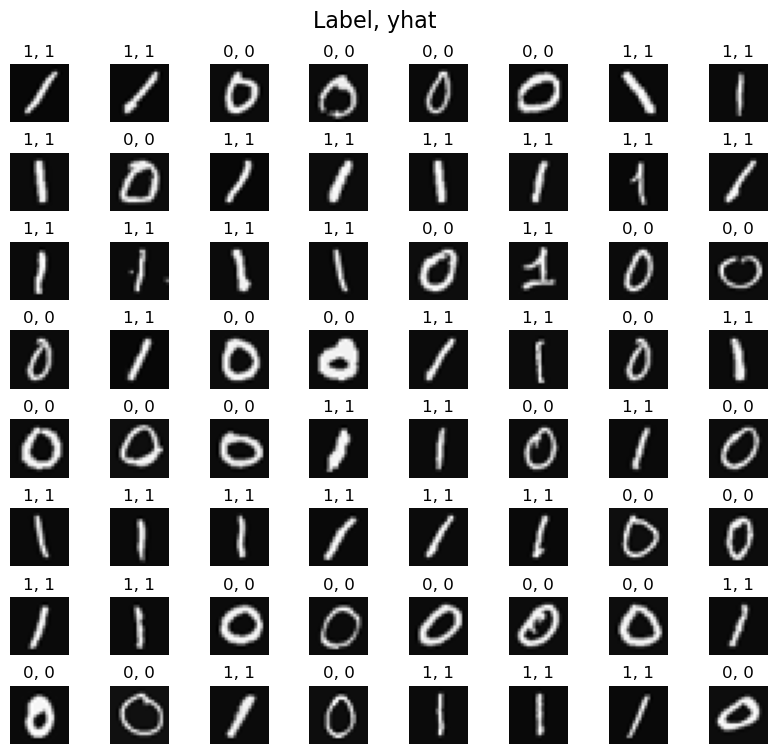

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    ax.set_title(f"{y[random_index,0]}, {yhat}")
    ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize = 16)
plt.show()

In [26]:
#NUMPY MODEL IMPEMENTATION (FORWARD PROP IN NUMPY)

def my_dense(a_in,W,b,g):
    units = W.shape[1]
    a_out = np.zeros(units)

    for j in range(units):
        w = W[:,j]
        z = np.dot(w,a_in)+b[j]
        a_out[j] = g(z)

    return(a_out)

In [28]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)

b_tst = 0.1*np.arange(1,4,1).reshape(3,)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [29]:
from public_tests import *
test_c2(my_dense)

All tests passed!


In [34]:
def my_sequential(x,W1,b1,W2,b2,W3,b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)

    return(a3)

In [35]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [36]:
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print("yhat = ",yhat, " label = ", y[0,0])

prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print("yhat = ",yhat, " label = ", y[500,0])

yhat =  0  label =  0
yhat =  1  label =  1


1/1 [==============================] - 0s 20ms/step


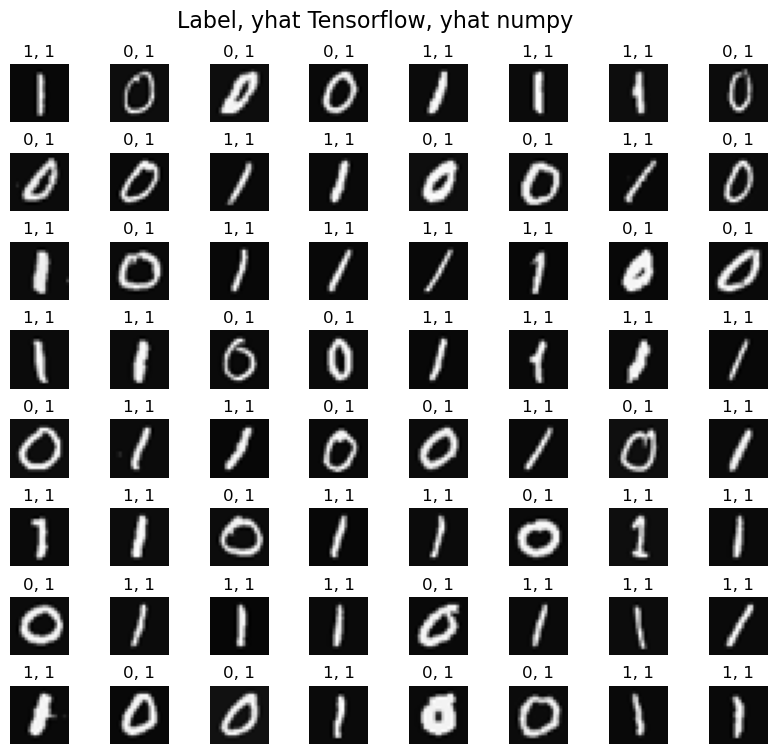

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
    my_yhat = int(my_prediction >= 0.5)

    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)

    ax.set_title(f"{y[random_index,0]}, {yhat}")
    ax.set_axis_off()

fig.suptitle("Label, yhat Tensorflow, yhat numpy", fontsize = 16)
plt.show()

In [38]:
x = X[0].reshape(-1,1)
z1 = np.matmul(x.T,W1)+b1
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


In [39]:
def my_dense_vektorized(A_in, W, b, g):

    Z = np.matmul(A_in,W)+b
    A_out = g(Z)

    return(A_out)

In [40]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3)
A_tst = my_dense_vektorized(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


In [41]:
from public_tests import *
test_c3(my_dense_vektorized)

All tests passed!


In [42]:
def my_sequential_vektorized(X, W1,b1,W2,b2,W3,b3):
    A1 = my_dense_vektorized(X, W1, b1, sigmoid)
    A2 = my_dense_vektorized(A1, W2, b2, sigmoid)
    A3 = my_dense_vektorized(A2, W3, b3, sigmoid)

    return(A3)

In [43]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [44]:
prediction = my_sequential_vektorized(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
prediction.shape

(1000, 1)

In [45]:
Yhat = (prediction >= 0.5).astype(int)
print("Predict a zero :",Yhat[0], "Prediction a one :",Yhat[500])

Predict a zero : [0] Prediction a one : [1]


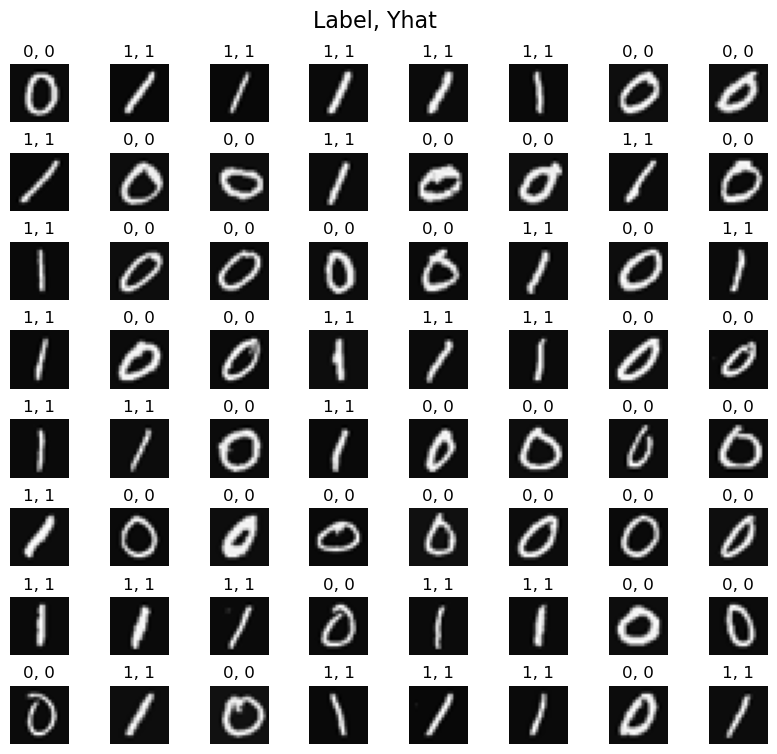

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index,0]}")
    ax.set_axis_off()

fig.suptitle("Label, Yhat", fontsize = 16)
plt.show()

In [59]:

#TO SEE IF THERE IS MISCLASSIFIED IMAGE
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)[0]  # Get the indices directly using [0]
if len(errors) > 0:
    random_index = errors[0]
    X_random_reshaped = X[random_index].reshape(20, 20).T
    plt.imshow(X_random_reshaped, cmap='gray')
    plt.title(f"{y[random_index, 0]}, {Yhat[random_index, 0]}")
    plt.axis('off')
    plt.show()
else:
    print("No errors found.")

No errors found.


<Figure size 100x100 with 0 Axes>